In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("C:/Users/unique/Downloads/Imag/hotel_booking.csv")
data.shape
data.drop(['name','phone-number','email','meal'],axis=1,inplace=True)
data['reservation_status_date']=pd.to_datetime(data['reservation_status_date'])
data.drop(['agent','company'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [4]:
data.describe(include=object)

,hotel,arrival_date_month,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,credit_card
count,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,177,8,5,10,12,3,4,3,9000
top,City Hotel,August,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,************4923
freq,79330,13877,48590,56477,97870,85994,74053,104641,89613,75166,28


In [5]:
data.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_spe

In [6]:
data.shape

(119390, 30)

In [7]:
data.dropna(axis='index',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64     

In [8]:
data.isnull().sum()
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [9]:
data=data[data['adr']<5000]
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [10]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


In [11]:
cancelled_per=data['is_canceled'].value_counts()
cancelled_per

is_canceled
0    74745
1    44152
Name: count, dtype: int64

In [12]:
data['is_canceled']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 118897, dtype: int64

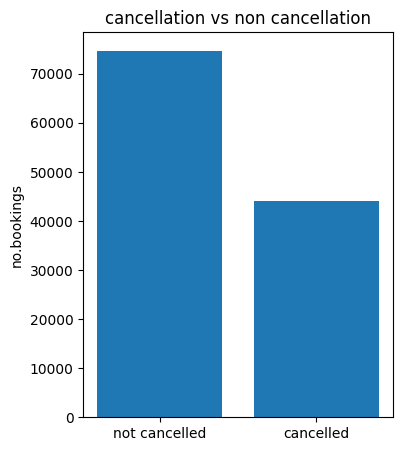

In [13]:
plt.figure(figsize=(4,5))
plt.bar(['not cancelled','cancelled'],cancelled_per)
plt.title("cancellation vs non cancellation")
plt.ylabel("no.bookings")
plt.show()

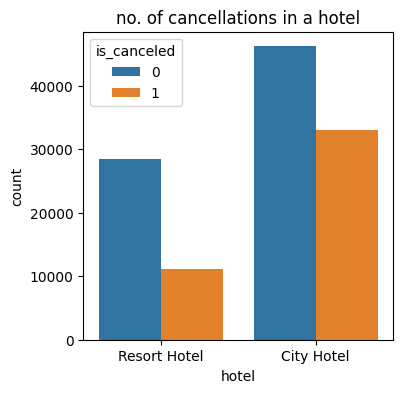

In [14]:
plt.figure(figsize=(4,4))
a1=sns.countplot(x='hotel',hue='is_canceled',data=data)
plt.title("no. of cancellations in a hotel")
plt.show()



In [15]:
resort=data[data['hotel']=='Resort Hotel']
resort['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [16]:
city=data[data['hotel']=='City Hotel']
city['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [17]:
resort=resort.groupby('reservation_status_date')[['adr']].mean()
city=city.groupby('reservation_status_date')[['adr']].mean()

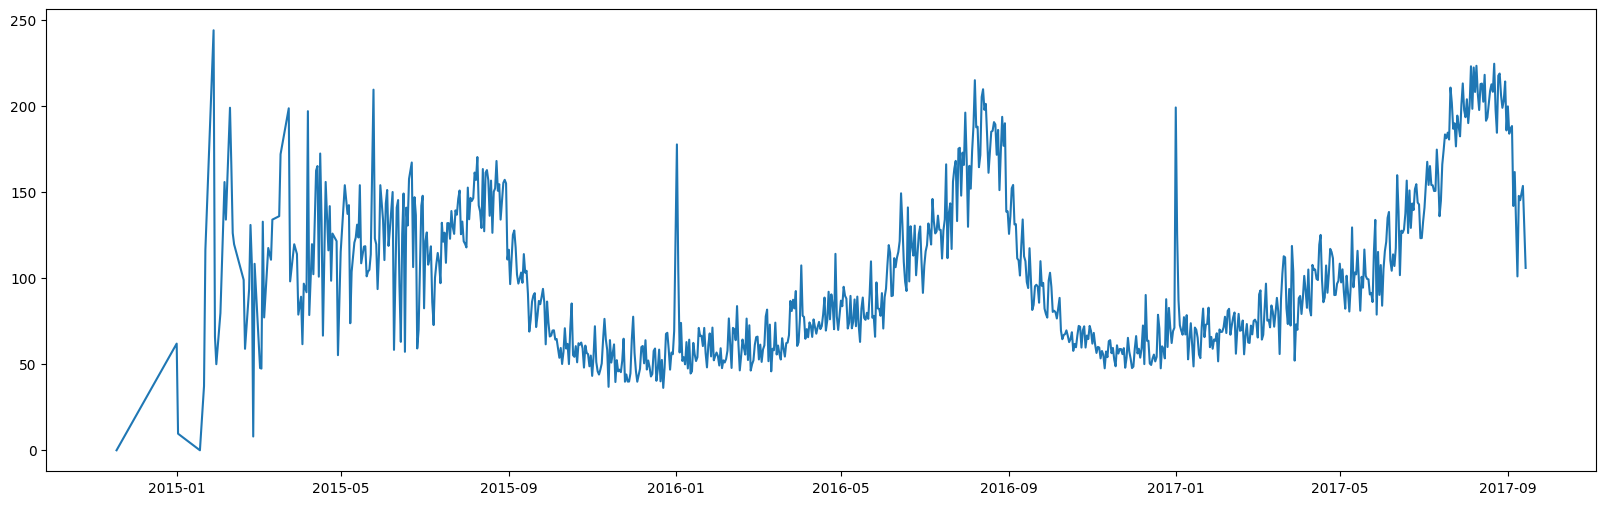

In [18]:
plt.figure(figsize=(20,6))
plt.plot(resort.index,resort['adr'],label="resort hotel")

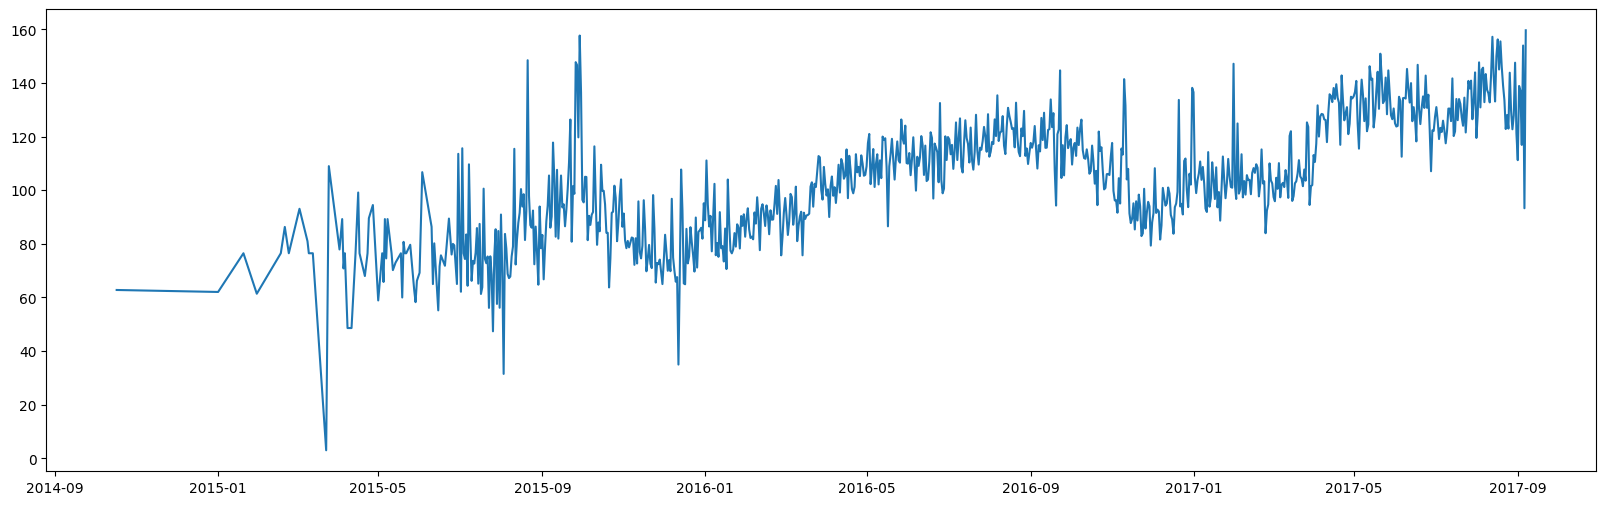

In [19]:
plt.figure(figsize=(20,6))
plt.plot(city.index,city['adr'],label="city hotel")
plt.show()

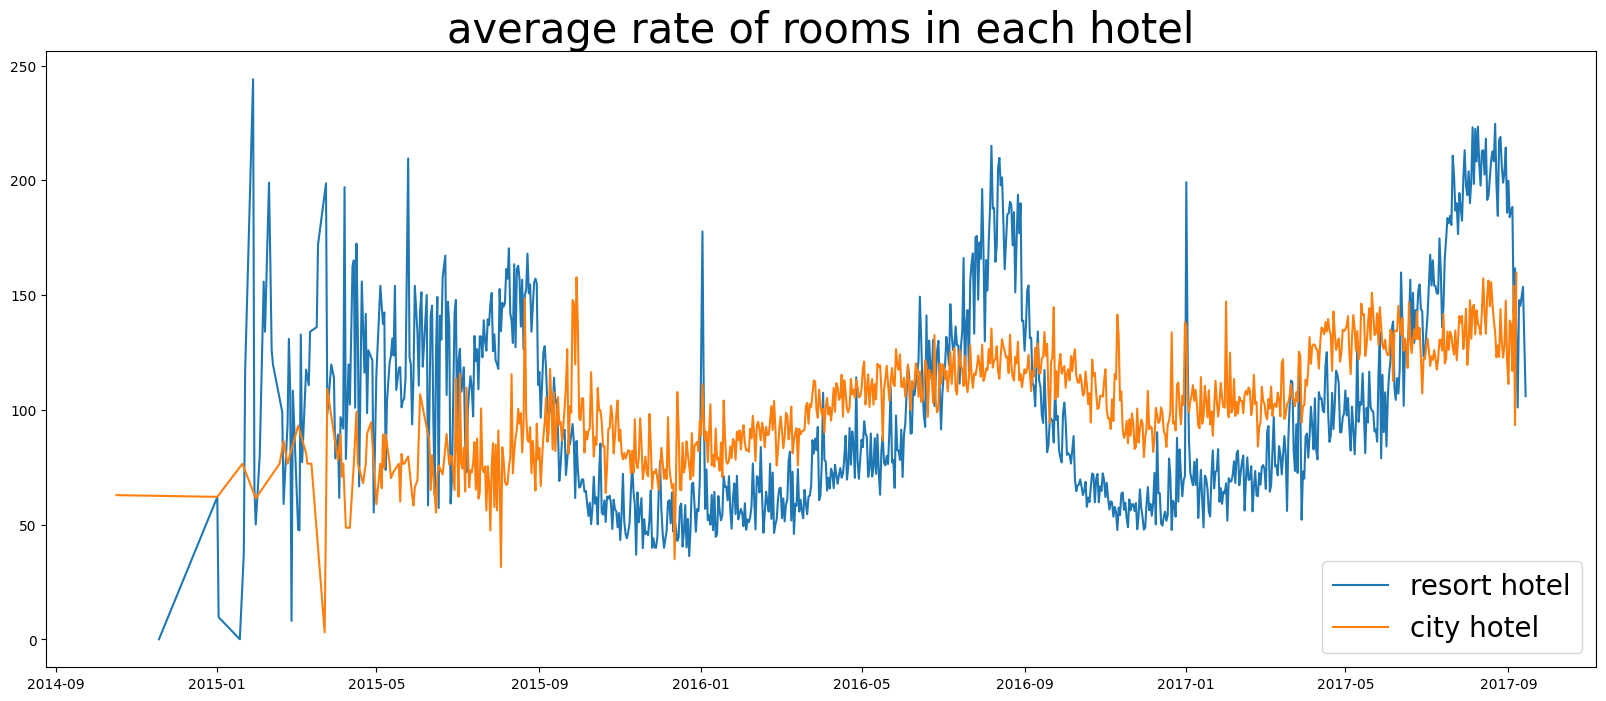

In [20]:
plt.figure(figsize=(20,8))
plt.title("average rate of rooms in each hotel",fontsize=30)
plt.plot(resort.index,resort['adr'],label="resort hotel")

plt.plot(city.index,city['adr'],label="city hotel")
plt.legend(fontsize=20)

Text(0.5, 1.0, 'monthly cancellation in hotels')

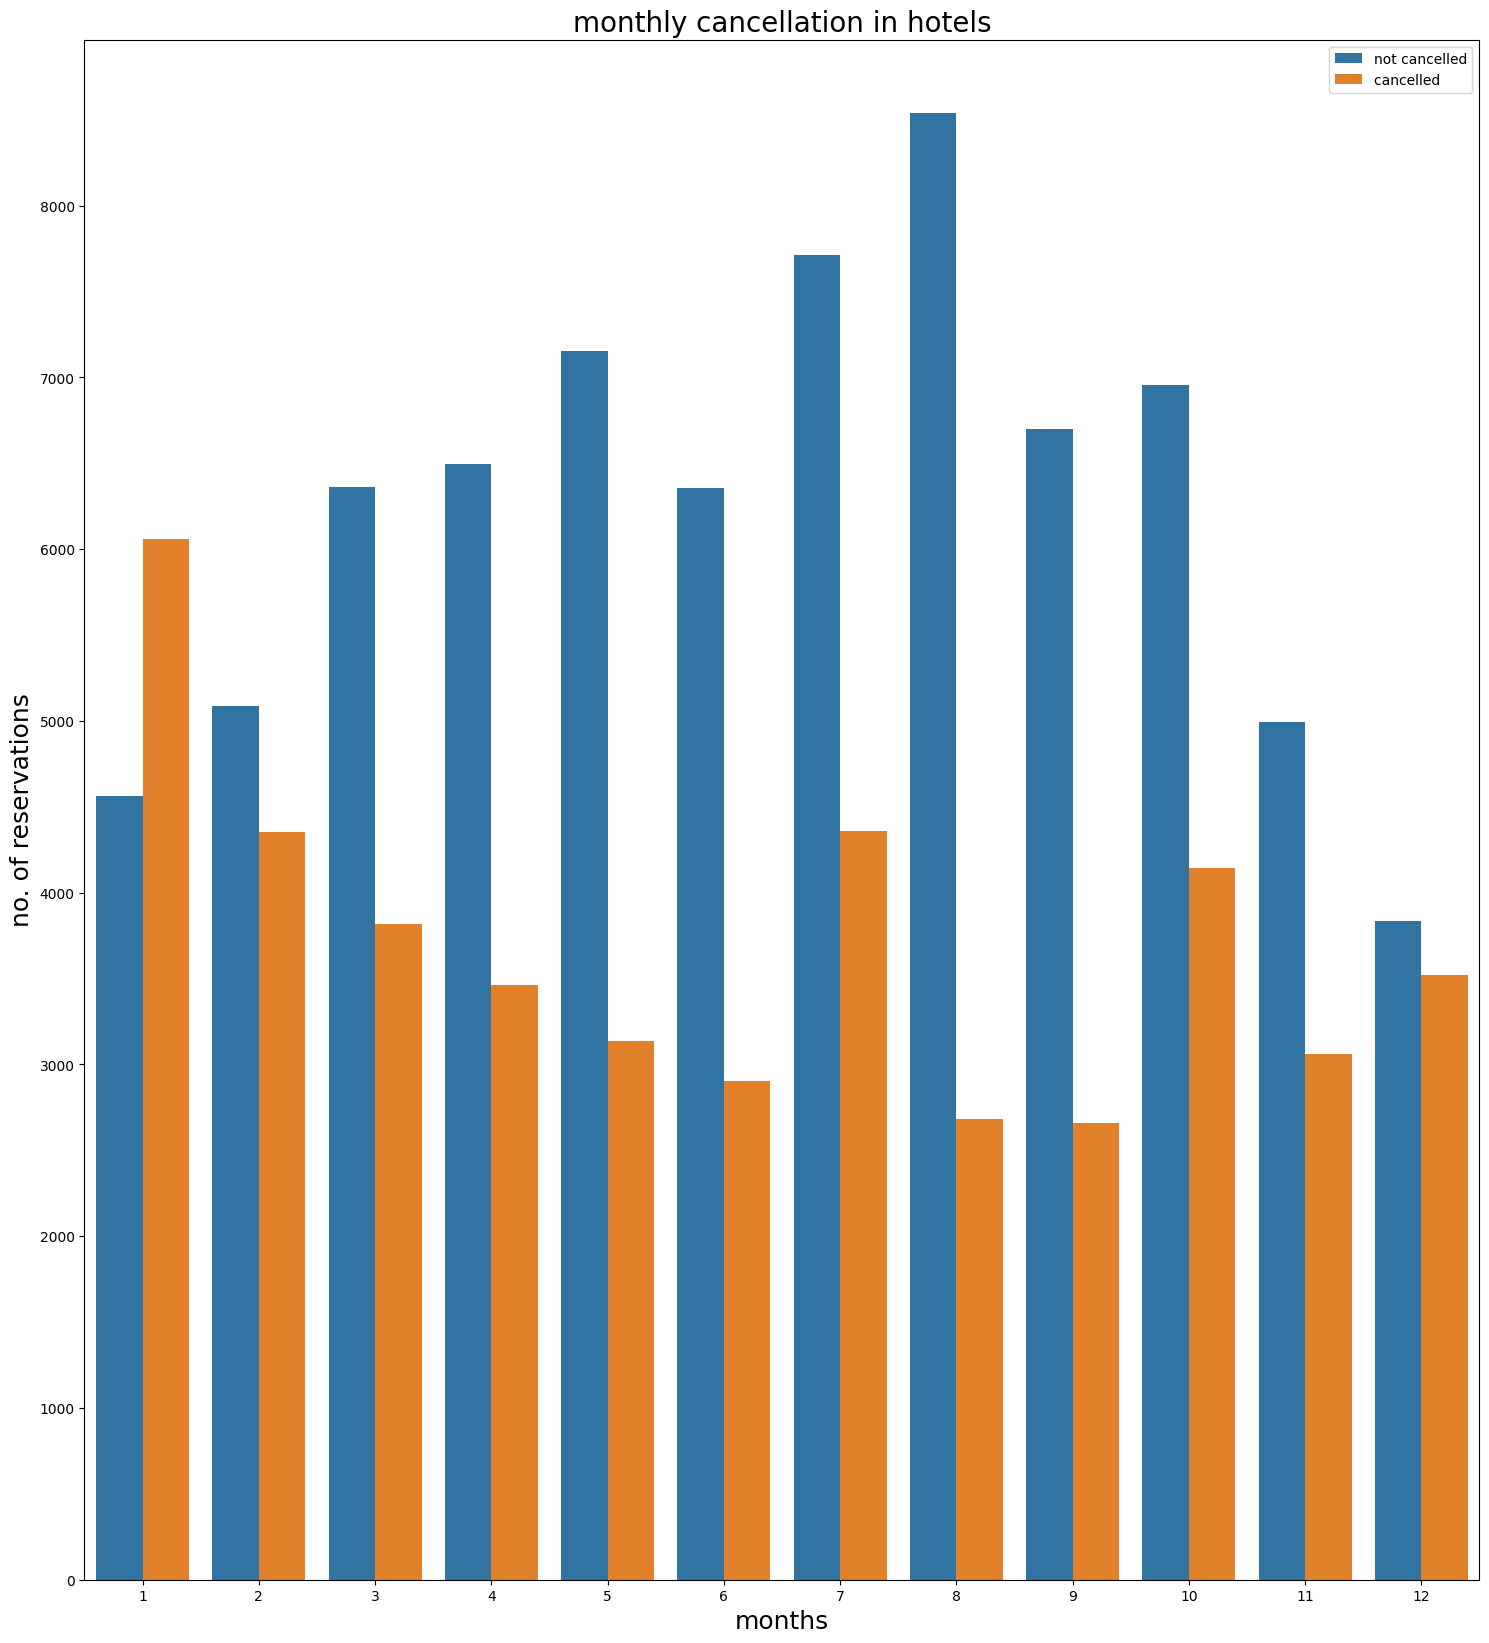

In [21]:
data['month']=data['reservation_status_date'].dt.month
plt.figure(figsize=(18,20))
sns.countplot(x='month',hue='is_canceled',data=data)
plt.legend(['not cancelled','cancelled '])
plt.xlabel('months',fontsize=18)
plt.ylabel('no. of reservations',fontsize=18)
plt.title("monthly cancellation in hotels",fontsize=20)


([<matplotlib.patches.Wedge at 0x1f198cbe150>,
 [Text(-0.6485414980270044, 0.888478432679651, 'PRT'),
  Text(-0.12452901505974424, -1.0929284168728757, 'GBR'),
  Text(0.2795827699816853, -1.0638766257087182, 'ESP'),
  Text(0.6082427774650023, -0.9165373553007318, 'FRA'),
  Text(0.8244337697170071, -0.7282231521657391, 'ITA'),
  Text(0.9549224064682716, -0.5460065911917595, 'DEU'),
  Text(1.0312598327523899, -0.38275730868464564, 'IRL'),
  Text(1.0729025706347506, -0.24265216653750293, 'BRA'),
  Text(1.0926161903610716, -0.12723938290033737, 'USA'),
  Text(1.0992090719340442, -0.041706308610296686, 'BEL')],
 [Text(-0.35374990801472966, 0.48462459964344595, '70.07'),
  Text(-0.06792491730531504, -0.5961427728397503, '6.25'),
  Text(0.1524996927172829, -0.5802963412956644, '5.54'),
  Text(0.331768787708183, -0.49992946652767184, '4.93'),
  Text(0.44969114711836744, -0.39721262845403943, '3.39'),
  Text(0.5208667671645117, -0.297821777013687, '3.10'),
  Text(0.5625053633194853, -0.20877671

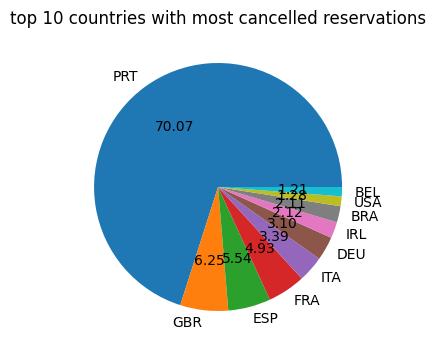

In [22]:
cancelled_data=data[data['is_canceled']==1]
plt.figure(figsize=(4,5))
plt.title("top 10 countries with most cancelled reservations")
top_country=cancelled_data['country'].value_counts()[:10]
plt.pie(top_country,autopct='%.2f',labels=top_country.index)

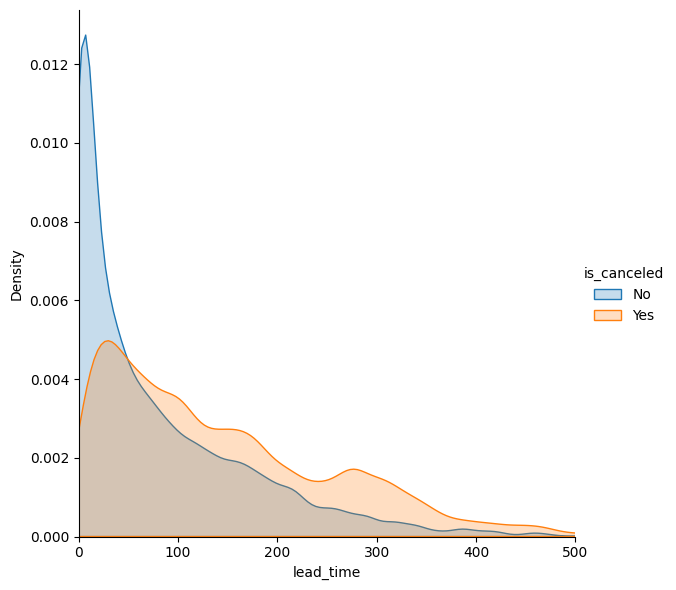

In [23]:
data['is_canceled'] = data['is_canceled'].replace(0,'No')
data['is_canceled'] = data['is_canceled'].replace(1,'Yes')
(sns.FacetGrid(data , hue = 'is_canceled',
             height = 6,
             xlim = (0,500))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend())


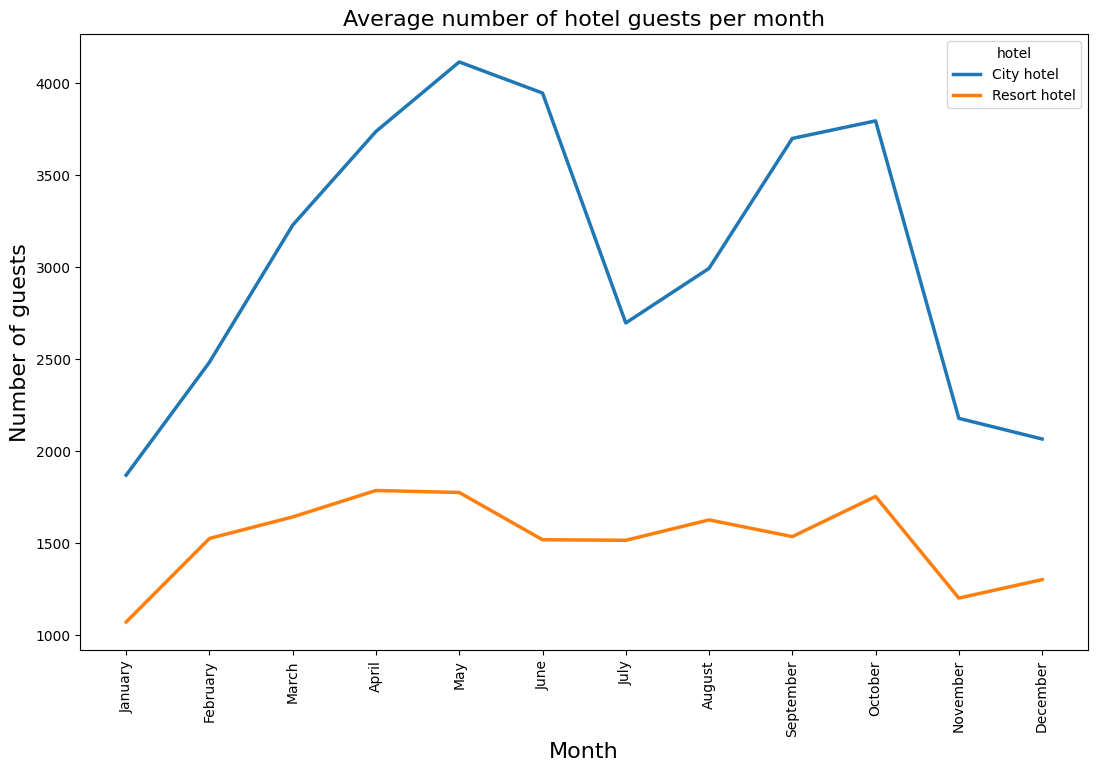

In [26]:
# Create a DateFrame with the relevant data:
resort=data[data['hotel']=='Resort Hotel']
city=data[data['hotel']=='City Hotel']
resort_guests_monthly = resort.groupby('arrival_date_month')['hotel'].count()
city_guests_monthly = city.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)


# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

#show figure:
plt.figure(figsize=(13, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

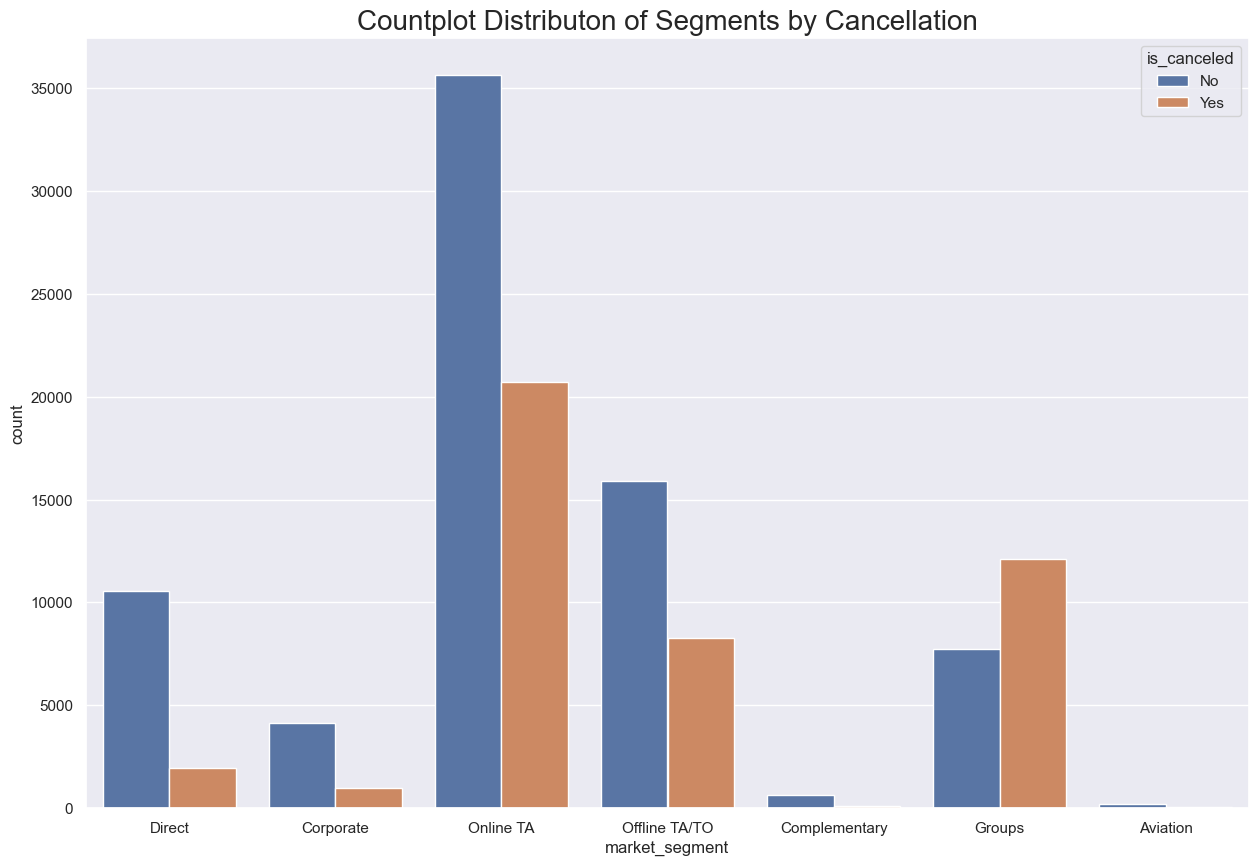

In [28]:
plt.figure(figsize = (15,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = data)

In [29]:
data['is_repeated_guest'] = data['is_repeated_guest'].replace(0,'No')
data['is_repeated_guest'] = data['is_repeated_guest'].replace(1,'Yes')
data['is_repeated_guest']

0         No
1         No
2         No
3         No
4         No
          ..
119385    No
119386    No
119387    No
119388    No
119389    No
Name: is_repeated_guest, Length: 118897, dtype: object

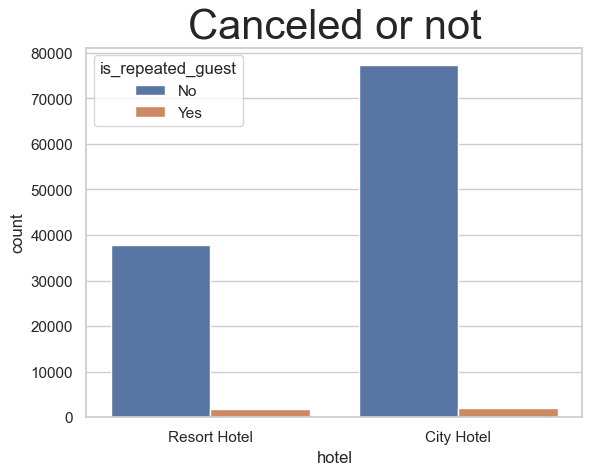

In [30]:
sns.set(style = "whitegrid")
plt.title("Canceled or not", fontdict = {'fontsize': 30})
canceled = sns.countplot(x = data.hotel, hue = 'is_repeated_guest', data = data)